# 1 Dimensional

In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate imaginary data from a Gaussian distribution
mean = 0  # mean of the distribution
std = 1  # standard deviation of the distribution
num_samples = int(1e4)  # number of samples

# Generate the data
data = np.random.normal(mean, std, num_samples)
print("Data generated!")

Data generated!


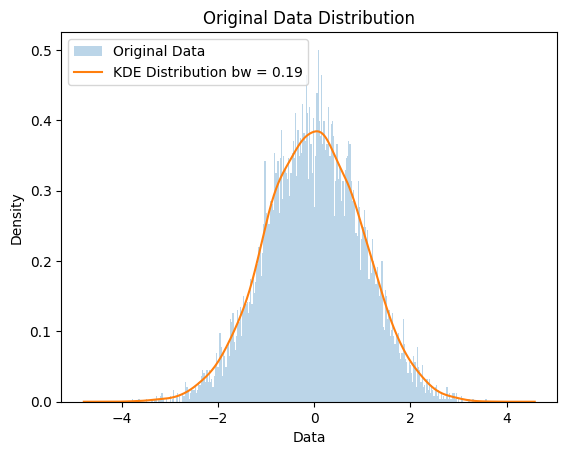

In [45]:

# Plot the original data distribution
plt.figure()
plt.hist(data, bins=300, density=True, alpha=0.3, label='Original Data')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Original Data Distribution')

# Fit the data using KDE
bandwith = 0.19
kde = KernelDensity(kernel='gaussian', bandwidth=bandwith).fit(data[:, np.newaxis])

# Generate the x-values where we will evaluate the KDE
x_values = np.linspace(min(data) - 1, max(data) + 1, 1000)

# Evaluate the KDE on the x-values
log_dens = kde.score_samples(x_values[:, np.newaxis])
dens = np.exp(log_dens)

# Plot the KDE fitted distribution
plt.plot(x_values, dens, label=f'KDE Distribution bw = {bandwith}')
plt.legend()

plt.show()


In [28]:
print("Bandwidth (factor):", kde.bandwidth_)
print(kde.sample(2))

Bandwidth (factor): 0.2
[[-1.19681697]
 [-0.77338354]]


## Crossvalidation

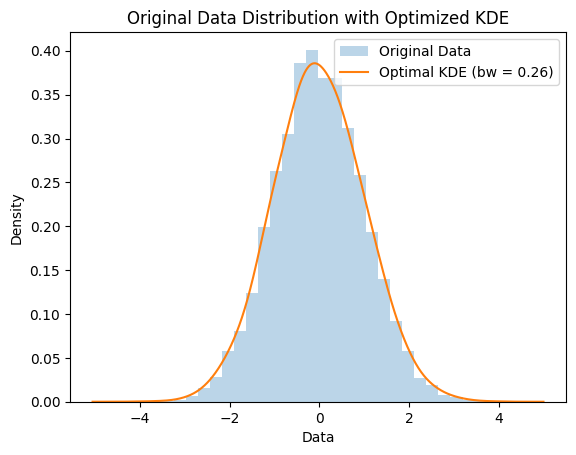

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Generate the data (as in your original example)
mean = 0  # mean of the distribution
std = 1  # standard deviation of the distribution
num_samples = 10000  # number of samples
data = np.random.normal(mean, std, num_samples)

# Define the grid of bandwidths to searchs
param_grid = {'bandwidth': np.linspace(0.01, 1.0, 5)}

# Run grid search with cross-validation
grid = GridSearchCV(KernelDensity(kernel='gaussian'), param_grid, cv=5)
grid.fit(data[:, np.newaxis])

# Best bandwidth
best_bandwidth = grid.best_params_['bandwidth']

# Plot the original data distribution
plt.figure()
plt.hist(data, bins=30, density=True, alpha=0.3, label='Original Data')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Original Data Distribution with Optimized KDE')

# Fit the data using best bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=best_bandwidth).fit(data[:, np.newaxis])

# Generate x-values for KDE
x_values = np.linspace(min(data) - 1, max(data) + 1, 1000)

# Evaluate the KDE
log_dens = kde.score_samples(x_values[:, np.newaxis])
dens = np.exp(log_dens)

# Plot KDE with best bandwidth
plt.plot(x_values, dens, label=f'Optimal KDE (bw = {best_bandwidth:.2f})')
plt.legend()

plt.show()


In [43]:
from sklearn.model_selection import KFold
from scipy.optimize import minimize_scalar
import numpy as np

# Define your data here
data = np.random.normal(0, 1, 10000)

kf = KFold(n_splits=5)  # 5-fold cross-validation

# Define objective function that returns negative log-likelihood
def objective(bandwidth, train_data, val_data):
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(train_data[:, np.newaxis])
    return -kde.score(val_data[:, np.newaxis])

# Cross-validation loop
bandwiths = []
for train_index, val_index in kf.split(data):
    train_data, val_data = data[train_index], data[val_index]

    # Optimize bandwidth on training data
    result = minimize_scalar(lambda bw: objective(bw, train_data, val_data), bounds=(0.1, 1.0), method='bounded')
    best_bandwidth = result.x
    bandwiths.append(best_bandwidth)
    print(best_bandwidth)
    
print("Average bandwidth:", np.mean(bandwiths))

0.16007210038932299
0.1801944605563883
0.20974770614836377
0.19049652265921818
0.21595220257523812
Average bandwidth: 0.19129259846570626


# 2 Dimensional

2D Data generated!


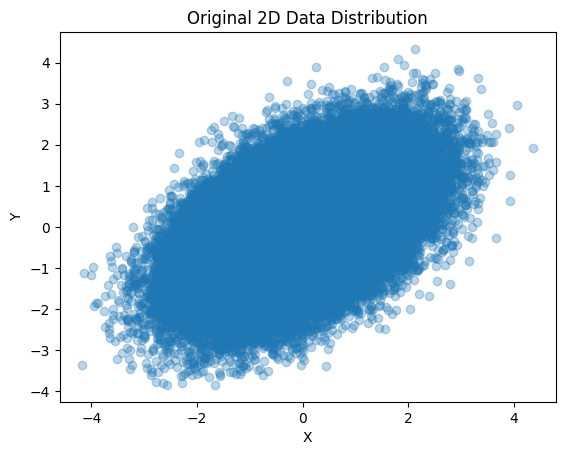

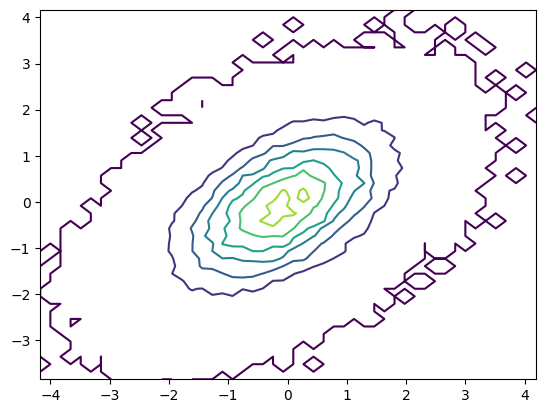

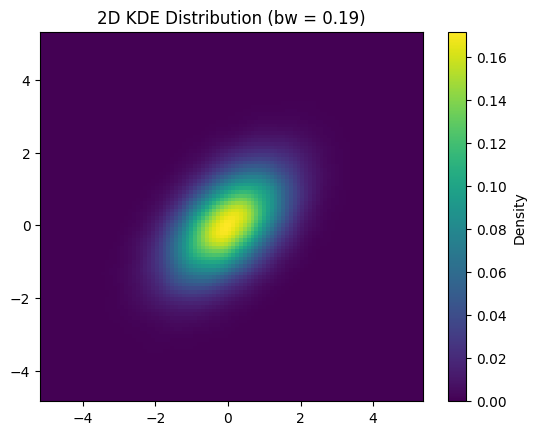

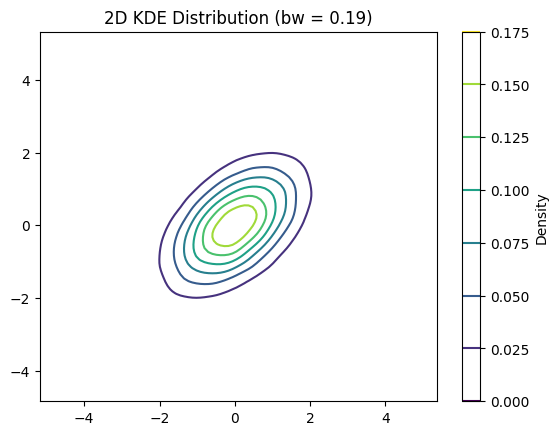

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate 2D imaginary data from a Gaussian distribution
mean = [0, 0]  # mean of the distribution for x and y
cov = [[1, 0.5], [0.5, 1]]  # covariance matrix
num_samples = int(1e5)  # number of samples

# Generate the 2D data
data = np.random.multivariate_normal(mean, cov, num_samples)
print("2D Data generated!")

# Plot the original 2D data distribution
plt.figure()
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label='Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original 2D Data Distribution')

# Plot the original 2D data as contours
nbins = 50
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], bins=nbins)
plt.figure()
plt.contour(xedges[:-1], yedges[:-1], hist.T, cmap='viridis')

# Fit the data using 2D KDE
bandwidth = 0.19
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde.fit(data)

# Generate the grid where we will evaluate the KDE
x_grid = np.linspace(min(data[:, 0]) - 1, max(data[:, 0]) + 1, 100)
y_grid = np.linspace(min(data[:, 1]) - 1, max(data[:, 1]) + 1, 100)
xv, yv = np.meshgrid(x_grid, y_grid)
gridpoints = np.array([xv.ravel(), yv.ravel()]).T

# Evaluate the 2D KDE on the grid
log_dens = kde.score_samples(gridpoints)
dens = np.exp(log_dens).reshape(xv.shape)

# Plot the 2D KDE fitted distribution
plt.figure()
plt.imshow(dens, extent=[x_grid[0], x_grid[-1], y_grid[0], y_grid[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.title(f'2D KDE Distribution (bw = {bandwidth})')


# Plot the 2D KDE as contours
plt.figure()
plt.contour(x_grid, y_grid, dens, cmap='viridis')
plt.colorbar(label='Density')
plt.title(f'2D KDE Distribution (bw = {bandwidth})')

plt.show()
